In [1]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
import sklearn.metrics as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_path = "../data/features_encoded.csv"  # our input file
raw_data = pd.read_csv(input_path, header=0, skiprows=None, index_col=None, delimiter=",")
raw_data

,malicious,length,extension,hostname,tld,isShortened,domainTokenCount,domainTokenLengthAvg,domainTokenLengthStdev,domainTokenLengthMax,pathTokenCount,pathTokenLengthAvg,pathTokenLengthStdev,pathTokenLengthMax
0,False,94,0,40,3,0,2,2.500000,0.707107,3,10,7.100000,2.131770,12
1,False,40,0,1687,0,0,2,5.000000,2.828427,7,3,8.666667,3.785939,13
2,True,48,1,18,0,0,2,6.000000,4.242641,9,5,5.200000,1.923538,8
3,False,109,0,110,14,0,2,4.500000,3.535534,7,18,4.111111,2.826115,12
4,False,50,1,26560,1,0,2,8.000000,7.071068,13,3,10.000000,8.185353,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,True,131,0,521,2,0,2,4.000000,1.414214,5,32,3.031250,2.007797,8
99997,False,40,1,16262,0,0,2,5.000000,2.828427,7,5,4.800000,2.387467,8
99998,False,56,0,16261,0,0,2,9.500000,9.192388,16,7,4.142857,2.794553,10
99999,False,20,0,36466,29,0,3,5.666667,6.350853,13,0,0.000000,0.000000,0


In [3]:
labels = raw_data['malicious'].apply(lambda x: 1 if x else 0)
features = raw_data.drop('malicious', axis=1)

train_features = features.iloc[:80000, :]
test_features = features.iloc[80000:, :]
train_labels = labels[:80000]
test_labels = labels[80000:]

In [4]:
def calculateNormalizationParams(data):
    means = data.mean()
    stdevs = data.std()
    stdevs[stdevs == 0] = 1  # Replace 0 std to avoid division by zero
    return means, stdevs

def applyNormalization(data, means, stdevs):
    return (data - means) / stdevs

In [5]:
means, stdevs = calculateNormalizationParams(train_features)
normalizedTrainFeatures = applyNormalization(train_features, means, stdevs)
normalizedTestFeatures = applyNormalization(test_features, means, stdevs)

In [12]:
logreg = LogisticRegression(random_state=0).fit(normalizedTrainFeatures, train_labels)
predictions = logreg.predict(normalizedTestFeatures)
probs = logreg.predict_proba(normalizedTestFeatures)
probs = pd.DataFrame(probs)
probs = probs.apply(lambda x: max(x[0],x[1]), axis=1)

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [15]:
acc = m.accuracy_score(test_labels, predictions)
prec = m.precision_score(test_labels, predictions)
recall = m.recall_score(test_labels, predictions)
f1 = m.f1_score(test_labels,predictions)
auc = m.roc_auc_score(test_labels,probs)
print("Accuracy score: " + str(acc))
print("Precision score: " + str(prec))
print("Recall score: " + str(recall))
print("F1 score: ", f1)
print("AUC-ROC: ", auc)

Accuracy score: 0.6916154192290386
Precision score: 0.7265508684863523
Recall score: 0.36627470602952217
F1 score:  0.48702594810379246
AUC-ROC:  0.4078707506518954


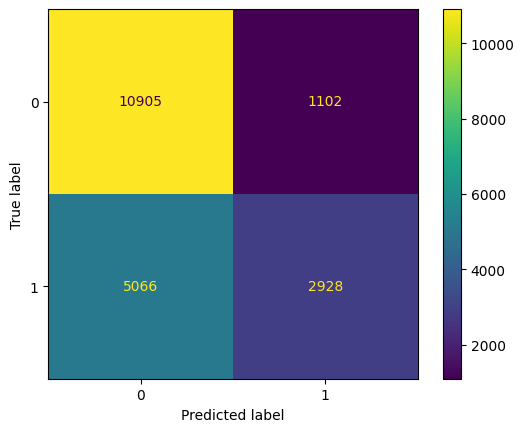

In [14]:
m.ConfusionMatrixDisplay(m.confusion_matrix(test_labels, predictions)).plot()

In [17]:
import pickle
with open('trained_models/logreg.pkl','wb') as f:
    pickle.dump(logreg,f)
print("Model dump complete!")

Model dump complete!
